In [ ]:
# 8 Task: Apply K-Means to cluster the given dataset and visualize the results.

#New dataset: Employee Job Satisfaction
data = pd.read_csv("employee.csv")

#Create DataFrame
df = pd.DataFrame(data)
df

Transformed Dataset:
   Email ID  Free (E)  Win (F)  Age  Income  Spam (H)
0         1         1        0   23   50000         1
1         2         0        1   45   60000         0
2         3         1        1   34   70000         1
3         4         0        0   50   55000         0
4         5         1        0   30   48000         1


C:\Users\ADMANTIUM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMANTIUM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(



Cluster Centers:
[[5.00000000e-01 1.00000000e+00 3.95000000e+01 6.50000000e+04]
 [6.66666667e-01 0.00000000e+00 3.43333333e+01 5.10000000e+04]]

Clustered Data:
   Free (E)  Win (F)  Age  Income  Cluster
0         1        0   23   50000        1
1         0        1   45   60000        0
2         1        1   34   70000        0
3         0        0   50   55000        1
4         1        0   30   48000        1


C:\Users\ADMANTIUM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMANTIUM\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


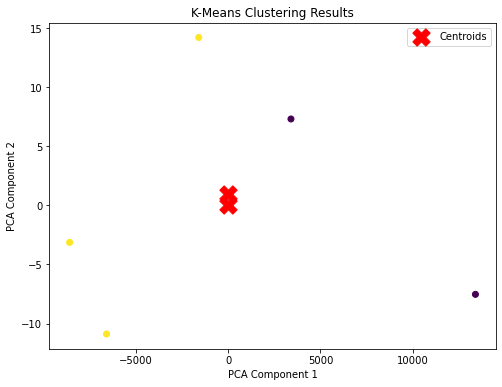

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Sample dataset
data = {
    'Email ID': [1, 2, 3, 4, 5],
    'Free (E)': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'Win (F)': ['No', 'Yes', 'Yes', 'No', 'No'],
    'Age': [23, 45, 34, 50, 30],
    'Income': [50000, 60000, 70000, 55000, 48000],
    'Spam (H)': ['Spam', 'Not Spam', 'Spam', 'Not Spam', 'Spam']
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical data into numerical values using Label Encoding
label_encoder = LabelEncoder()
df['Free (E)'] = label_encoder.fit_transform(df['Free (E)'])
df['Win (F)'] = label_encoder.fit_transform(df['Win (F)'])
df['Spam (H)'] = label_encoder.fit_transform(df['Spam (H)'])  # Target column

# Show the transformed dataset
print("Transformed Dataset:")
print(df)

# Features for clustering (X)
X = df[['Free (E)', 'Win (F)', 'Age', 'Income']]  # Features for clustering

# Applying KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # We choose 2 clusters (Spam and Not Spam)
kmeans.fit(X)

# Get the cluster labels
df['Cluster'] = kmeans.labels_

# Print the cluster centers and labels
print("\nCluster Centers:")
print(kmeans.cluster_centers_)

print("\nClustered Data:")
print(df[['Free (E)', 'Win (F)', 'Age', 'Income', 'Cluster']])

# Reduce the data to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply KMeans clustering again to get cluster labels
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Plot the results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()
